**Impartial and Unbiased Apportionment: Tables**\
Ross Hyman

Supplement to\
**Impartial and Unbiased Apportionment: Meeting the Ideal of One Person One Vote**\
https://arxiv.org/abs/2201.11787 by Ross Hyman and Nicolaus Tideman

This notebook contains code to reproducing the tables in the paper.

 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from scipy.stats import lognorm
from scipy.stats import uniform

The census data is downloadable at https://www.census.gov/data/tables/2020/dec/2020-apportionment-data.html

In [2]:
df = pd.read_excel('apportionment-2020-tableC2.xlsx')
df


,U.S. Department of Commerce,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,This cell is intentionally blank.,...,Unnamed: 43,Unnamed: 44,This cell is intentionally blank..4,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,U.S. Census Bureau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table C2. Apportionment Population and Number ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table C2. Apportionment Population and Number ...,...,NaN,NaN,Table C2. Apportionment Population and Number ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State,2020,NaN,NaN,NaN,2010,NaN,NaN,NaN,State,...,NaN,NaN,State,1920 2,NaN,NaN,1910 3,NaN,NaN,NaN
3,NaN,2020: Apportionment population,2020: \nNumber of representatives,2020: \nSeat change,2020: Average persons per representative,2010: Apportionment population,2010: \nNumber of representatives,2010: \nSeat change,2010: Average persons per representative,NaN,...,1930: \nSeat change,1930: Average persons per representative,NaN,1920: Apportionment population,1920: \nNumber of representatives,1920: Average persons per representative,1910: Apportionment population,1910: \nNumber of representatives,1910: \nSeat change\n(since 1900),1910: Average persons per representative
4,Alabama,5030053,7,0,718579,4802982,7,0,686140,Alabama,...,-1,294027,Alabama,2348174,10,234817,2138093,10,1,213809
5,Alaska,736081,1,0,736081,721523,1,0,721523,Alaska,...,X,X,Alaska,X,X,X,X,X,X,X
6,Arizona,7158923,9,0,795436,6412700,9,1,712522,Arizona,...,0,389375,Arizona,309495,1,309495,X,X,X,X
7,Arkansas,3013756,4,0,753439,2926229,4,0,731557,Arkansas,...,0,264921,Arkansas,1752204,7,250315,1574449,7,0,224921
8,California,39576757,52,-1,761091,37341989,53,0,704566,California,...,9,283412,California,3426031,11,311457,2376561,11,3,216051
9,Colorado,5782171,8,1,722771,5044930,7,0,720704,Colorado,...,0,258712,Colorado,939161,4,234790,798572,4,1,199643


The population data are in the columns in which the second row is a number.

In [3]:
df.columns = df.iloc[2]
states=df.iloc[:,0]
df = df[[2020,2010,2000,1990,1980,1970,'1960 1']].iloc[4:-3].astype('float')
df['State'] = states
df.set_index('State',inplace=True)
df.rename({'1960 1':1960},axis=1,inplace=True)
df.columns.name = ''
df

,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,5030053.0,4802982.0,4461130.0,4062608.0,3890061.0,3475885.0,3266740.0
Alaska,736081.0,721523.0,628933.0,551947.0,400481.0,304067.0,226167.0
Arizona,7158923.0,6412700.0,5140683.0,3677985.0,2717866.0,1787620.0,1302161.0
Arkansas,3013756.0,2926229.0,2679733.0,2362239.0,2285513.0,1942303.0,1786272.0
California,39576757.0,37341989.0,33930798.0,29839250.0,23668562.0,20098863.0,15717204.0
Colorado,5782171.0,5044930.0,4311882.0,3307912.0,2888834.0,2226771.0,1753947.0
Connecticut,3608298.0,3581628.0,3409535.0,3295669.0,3107576.0,3050693.0,2535234.0
Delaware,990837.0,900877.0,785068.0,668696.0,595225.0,551928.0,446292.0
Florida,21570527.0,18900773.0,16028890.0,13003362.0,9739992.0,6855702.0,4951560.0


Webster proposed rounding at the algebraic mean between the quota rounded down and rounded up. Huntingtin-Hill proposed rounding at the geometric mean. We including these means and an infinite number of others with the formula $$r_\beta(f) = \left(\frac{(f+1)^{\beta+1} -f^{\beta+1}}{\beta +1}\right)^{1/\beta}$$ where $f$ is the quota rounded down. Paretrized in this way, $\beta=1$ is Webster rounding and $\beta = -2$ is Huntington-Hill rounding. Later we will see that rounding at  $r_\beta(f)$ is unbiased for states drawn from a power law distribution.

In [4]:
def beta_apportionment(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    family = np.floor(quota,dtype='float64')
    if beta == -1:
        rounding_mark = [0  if family[i] ==0 else 1/(np.log(family[i]+1)-np.log(family[i])) for i in range(len(population))]   
    elif beta <0:
        rounding_mark = [0  if family[i] ==0 else (((family[i]+1)**(beta+1)-family[i]**(beta+1))/(beta+1))**(1/beta) for i in range(len(population))]
    elif beta ==0 :
        rounding_mark = [np.exp(-1) if family[i] ==0 else np.exp((family[i]+1)*np.log(family[i]+1)-family[i]*np.log(family[i])-1) for i in range(len(population))]
    else: 
        rounding_mark = (((family+1)**(beta+1)-family**(beta+1))/(beta+1))**(1/beta)
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats

**Impartial Apportionment**

We reexamine apportionment by treating groups of states rather than the individual states, as the fundamental entities that are to be apportioned seats.  

All the states whose divisor method quotas fall in the region $f\le q < f+1$, that is, all states with divsior method quotas whose integer part is $f$, we call the $f$ family of states. We call the sum of the divisor method quotas of all states in the $f$ family $Q_f$. In general, $Q_f$ is not an integer. We round $Q_f$ to an integer following a prescribed rounding method to determine the number of seats for the $f$ family, and we call that integer $S_f$. The value of $S_f$ depends on the apportionment method. 

Once an integer $S_f$ is chosen, assigning seats to the $N_f$ states in the $f$ family is uniquely determined by
\begin{eqnarray}
M_f &=& (f+1)N_f -S_f\nonumber\\
M_{f+1} &=& S_f - fN_f
\end{eqnarray}
where the $M_f$ smallest states in the family are assigned $f$ seats each and the $M_{f+1}$ largest states in the family are assigned $f+1$ seats each. Which states are in which group is uniquely determined by insisting that $s_c \ge s_d$ if $v_c > v_d$, where $v_c$ is the population of state c.

If we want the rounding rule to apportion the same numbers of seats to a family containing a large number of small-population states as it does to another family with the same total population, but containing a small number of large-population states, then the rounding rule can depend only on $Q$. Furthermore, we want the number of apportioned seats for the family to be as close as possible to $Q$ according to a measure of closeness such as Webster rounding which minimizes $|S-Q|$ or Huntington-Hill rounding which minimizes $|\log S - \log Q |$. We call an apportionment method that satisfied these properties, such as Webster's method applied to families and the Huntington-Hill method applied to families, an impartial method. Other divisor methods as well as Hamilton's method, can also be made impartial by applying them to families rather than states.

The Alabama paradox, including the multiple solution paradox, cannot happen for Webster's method applied to families (details are in the paper), for which the rounding up or down of the family quota does not depend on the integer part of the family quota. Below we code Webster for families.

In [5]:
def webster_for_families(population, s_in,beta=1,pop_g=1,sigma=1):
    quota = pd.DataFrame()
    quota['quota'] = population*s_in/np.sum(population)
    quota['family'] = quota['quota'].apply(np.floor).astype('int')
    family = pd.DataFrame(quota.groupby('family').sum())
    family['seats'] = family['quota'].round().astype('int')
    family['number'] = quota['family'].value_counts()
    last_fam=-1
    W_F = np.empty(len(population)).astype(int)
    for j,state in enumerate(quota.index):
        if quota.loc[state,'family'] != last_fam:
            order=1
        else: 
            order +=1
        last_fam = quota.loc[state,'family']
        if order <= family.loc[last_fam,'number']*(last_fam+1)-family.loc[last_fam,'seats']:
            W_F[j]=last_fam
        else:
            W_F[j]=last_fam+1  
    return W_F

**Unbiased Apportionment**
If the states are drawn from a known or theoretical distribution of states, then it is possible to base the apportionment method on the distribution of states rather than a particular sample. Using a distribution from which states are drawn, our task is to find the apportionment method that is unbiased in the sense that if states are repeatedly drawn from the same distribution, then seats are apportioned such that $<S_f>$, the expected value of the number of seats apportioned to the $f$ family, is equal to $<Q_f>$, the expected value of the total $f$ family quota. Such an apportionment method, for which $<S_f>=<Q_f>$ for every $f$, we call an unbiased apportionment. 

Rounding marks (details in the paper) for unbiased apportionments are determined from
\begin{equation}\label{RD}
I(rD)= \frac{1}{D}\int_{fD}^{(f+1)D} I(v) d v
\end{equation}
so that
\begin{equation}\label{RF}
r(f,D) = \frac{1}{D}I^{-1}\left(\frac{1}{D}\int_{fD}^{(f+1)D} I(v)dv\right),
\end{equation}
where $I$ is the commulative distribution function \begin{equation}
    \frac{d I(v)}{d v} = p(v),
\end{equation}
for the distribution $p(v)$.

Consider the power law population distribution, $p_\beta\propto v^{\beta-1}$. The cumulative distribution function is $I(v) \propto v^\beta$. Solving for $r_\beta(f)$ we have
\begin{equation}
r_\beta(f)= \frac{1}{D}\left(\frac{1}{D}\int_{fD}^{(f+1)D} v^{\beta}dv\right)^{1/\beta}= \left(\frac{(f+1)^{\beta+1} -f^{\beta+1}}{\beta +1}\right)^{1/\beta}
\end{equation}
These are the $\beta$ apportionments are coded above. 

We also consider unbiased apportionments for states drawn from a log normal distribution,
\begin{equation}
p(v) =  \frac{\exp\left(-\frac{\log^2(v/v_g)}{2\sigma^2}\right)}{v\sqrt{2\pi\sigma^2}}.
\end{equation}
The rounding marks are determined from
\begin{eqnarray}
  &&I_{LN}\left(r,\log q_g,\sigma\right) = I_{LN}\left((f+1),\log q_g,\sigma\right)(f+1)\nonumber\\
  &&-I_{LN}\left(f,\log q_g, \sigma\right)f - I_{LN}\left((f+1),\sigma^2+ \log   q_g,\sigma\right)e^{\sigma^2/2}q_g \nonumber\\&&
  +  I_{LN}\left(f,\sigma^2 + \log q_g,\sigma\right)e^{\sigma^2/2}q_g,
\end{eqnarray}


The cell below contains the log normal apportionment code and below that we present all of the apportionments coded in this notebook.

In [6]:
def lognormal_apportionment(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    q_g = pop_g*s_in/np.sum(population)
    family = np.floor(quota,dtype='float64')
    x = (family+1)*lognorm.cdf(family+1,sigma,scale=q_g) - family*lognorm.cdf(family,sigma,scale=q_g) - q_g*np.exp(0.5*sigma**2)*(lognorm.cdf(family+1,sigma,scale=q_g*np.exp(sigma**2)) -lognorm.cdf(family,sigma,scale=q_g*np.exp(sigma**2)))
    rounding_mark = lognorm.ppf(x, sigma,scale=q_g)
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats

In [7]:
s_tot=435
apportionment = df[[2020]].astype('int')
apportionment.rename({2020:'pop'},axis=1,inplace=True)
apportionment.sort_values(by=['pop'],inplace=True)
apportionment['WF'] = webster_for_families(apportionment['pop'], s_tot)
apportionment['WS'] =beta_apportionment(apportionment['pop'], s_tot).astype('int')
logpop= np.log(apportionment['pop'].astype('float'))
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)
apportionment['LN'] =lognormal_apportionment(apportionment['pop'],s_tot,pop_g=pop_g,sigma=std).astype('int')
apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
print(apportionment.sort_values(by=['q']))

                     pop  WF  WS  LN          q   f
State                                              
Wyoming           577719   1   1   1   0.758989   0
Vermont           643503   1   1   1   0.845414   0
Alaska            736081   1   1   1   0.967040   0
North Dakota      779702   1   1   1   1.024348   1
South Dakota      887770   1   1   1   1.166325   1
Delaware          990837   1   1   1   1.301731   1
Montana          1085407   1   1   1   1.425974   1
Rhode Island     1098163   2   1   1   1.442733   1
Maine            1363582   2   2   2   1.791432   1
New Hampshire    1379089   2   2   2   1.811804   1
Hawaii           1460137   2   2   2   1.918283   1
West Virginia    1795045   2   2   2   2.358274   2
Idaho            1841377   2   2   2   2.419144   2
Nebraska         1963333   3   3   3   2.579366   2
New Mexico       2120220   3   3   3   2.785479   2
Kansas           2940865   4   4   4   3.863617   3
Mississippi      2963914   4   4   4   3.893898   3
Arkansas    

Below we show the apportionments for states grouped into families.

In [8]:
print(apportionment.groupby('f').sum())



         pop  WF  WS  LN          q
f                                  
0    1957303   3   3   3   2.571444
1    9044687  12  11  11  11.882629
2    7719975  10  10  10  10.142264
3    8918535  12  12  12  11.716895
4   13184418  17  17  17  17.321280
5   12714358  17  17  17  16.703730
6   14816233  19  20  20  19.465108
7   17389396  23  24  24  22.845650
8   19135839  25  25  25  25.140072
9   21109289  28  27  27  27.732730
10   7715946  10  10  10  10.136971
11   8654542  11  11  11  11.370069
12   9294493  12  12  12  12.210817
13  20538390  27  27  27  26.982700
14  10725274  14  14  14  14.090533
15  11808848  16  16  16  15.514099
16  12822739  17  17  17  16.846117
17  13011844  17  17  17  17.094557
26  20215751  27  27  27  26.558827
28  21570527  28  28  28  28.338690
38  29183290  38  38  38  38.340102
51  39576757  52  52  52  51.994717


Rounding marks for power law distributions.

In [9]:
def rounding_mark(family,beta) :
    if beta == -1:
        r_m = [0  if f ==0 else 1/(np.log(f+1)-np.log(f)) for f in family]
    elif beta <0:
        r_m = [0  if f ==0 else (((f+1)**(beta+1)-f**(beta+1))/(beta+1))**(1/beta) for f in family]
    elif beta ==0 :
        r_m = [np.exp(-1) if f ==0 else np.exp((f+1)*np.log(f+1)-f*np.log(f)-1) for f in family]
    else: 
        r_m = (((family+1)**(beta+1)-family**(beta+1))/(beta+1))**(1/beta)
    return r_m
r_m=pd.DataFrame()
r_m['f']=[x for x in range(5)]
r_m['-inf'] = r_m.f
for beta in range(-4,5):
    r_m[str(beta)] = rounding_mark(r_m.index,beta)
r_m['inf'] = r_m.f+1
r_m

,f,-inf,-4,-3,-2,-1,0,1,2,3,4,inf
0,0,0,0.000000,0.000000,0.000000,0.000000,0.367879,0.5,0.577350,0.629961,0.668740,1
1,1,1,1.360750,1.386723,1.414214,1.442695,1.471518,1.5,1.527525,1.553616,1.577967,2
2,2,2,2.416603,2.432881,2.449490,2.466303,2.483186,2.5,2.516611,2.532899,2.548755,3
3,3,3,3.440454,3.452217,3.464102,3.476059,3.488042,3.5,3.511885,3.523649,3.535251,4
4,4,4,4.453694,4.462886,4.472136,4.481420,4.490716,4.5,4.509250,4.518443,4.527558,5


Rounding marks for lognormal distributions

In [10]:
def ln_rounding_mark(family,q_g,sigma=1) :
    x = (family+1)*lognorm.cdf(family+1,sigma,scale=q_g) - family*lognorm.cdf(family,sigma,scale=q_g) - q_g*np.exp(0.5*sigma**2)*(lognorm.cdf(family+1,sigma,scale=q_g*np.exp(sigma**2)) -lognorm.cdf(family,sigma,scale=q_g*np.exp(sigma**2)))
    return lognorm.ppf(x, sigma,scale=q_g)

ln_r_m=pd.DataFrame()
ln_r_m['f']=[0,1,2,5,10,20]
for q_g in [1,2,5,10,20]:
    ln_r_m[str(q_g)] = ln_rounding_mark(ln_r_m.f,q_g)
ln_r_m

,f,1,2,5,10,20
0,0,0.490962,0.539388,0.591204,0.623039,0.649947
1,1,1.461028,1.480611,1.506080,1.524793,1.542863
2,2,2.468015,2.479648,2.494988,2.506509,2.517910
3,5,5.479500,5.484755,5.491707,5.496963,5.502212
4,10,10.486700,10.489450,10.493087,10.495839,10.498590
5,20,20.491829,20.493237,20.495099,20.496508,20.497917


In [11]:
logpops = np.log(df.astype('float'))
print (logpops)

                     2020       2010       2000       1990       1980  \
State                                                                   
Alabama         15.430941  15.384748  15.310913  15.217336  15.173935   
Alaska          13.509095  13.489120  13.351780  13.221207  12.900422   
Arizona         15.783870  15.673791  15.452697  15.117876  14.815358   
Arkansas        14.918698  14.889225  14.801228  14.675120  14.642101   
California      17.493753  17.435629  17.339834  17.211335  16.979658   
Colorado        15.570290  15.433894  15.276885  15.011828  14.876364   
Connecticut     15.098747  15.091328  15.042086  15.008120  14.949354   
Delaware        13.806305  13.711124  13.573526  13.413085  13.296695   
Florida         16.886838  16.754713  16.589903  16.380718  16.091751   
Georgia         16.188114  16.090474  15.920495  15.688607  15.513740   
Hawaii          14.194041  14.128028  14.011605  13.924611  13.779883   
Idaho           14.426024  14.268812  14.075776  13

In [12]:
log_stats=pd.DataFrame()
log_stats['mean']= logpops.mean(axis=0)
log_stats['std'] = logpops.std(axis=0)
log_stats['skew'] = logpops.skew(axis=0)
log_stats['kurtosis']=logpops.kurtosis(axis=0)

In [13]:
log_stats

,mean,std,skew,kurtosis
,,,,
2020,15.218341,1.023621,-0.047106,-0.514278
2010,15.155834,1.018917,-0.054456,-0.537054
2000,15.062141,1.019752,-0.052196,-0.572230
1990,14.938597,1.017613,-0.014790,-0.629895
1980,14.849569,1.020792,-0.073199,-0.719248
1970,14.714294,1.062651,-0.091399,-0.718738
1960,14.582588,1.071086,-0.172290,-0.606093


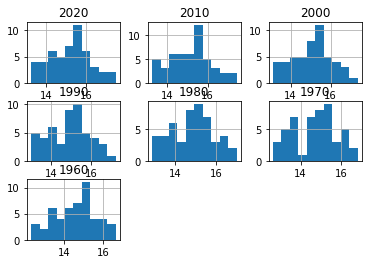

In [14]:
logpops.hist();

In [25]:
s_tot=6000
apportionment['WF'] = webster_for_families(apportionment['pop'], s_tot)
apportionment['WS'] =beta_apportionment(apportionment['pop'], s_tot).astype('int')
apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
print(apportionment)

                     pop   WF   WS  LN           q    f
State                                                  
Wyoming           577719   10   10   1   10.468818   10
Vermont           643503   12   12   1   11.660887   11
Alaska            736081   13   13   1   13.338488   13
North Dakota      779702   14   14   1   14.128942   14
South Dakota      887770   16   16   1   16.087237   16
Delaware          990837   18   18   1   17.954910   17
Montana          1085407   20   20   1   19.668608   19
Rhode Island     1098163   20   20   1   19.899759   19
Maine            1363582   25   25   2   24.709404   24
New Hampshire    1379089   25   25   2   24.990405   24
Hawaii           1460137   26   26   2   26.459072   26
West Virginia    1795045   33   33   2   32.527924   32
Idaho            1841377   33   33   2   33.367504   33
Nebraska         1963333   36   36   3   35.577463   35
New Mexico       2120220   38   38   3   38.420405   38
Kansas           2940865   53   53   4   53.2912

In [30]:
def divisor_method(population, s_tot, apportionment_function,beta=1,pop_g=1,sigma=1):
    s_in = s_tot
    s_small = 0
    s_big= s_tot*2
    s_out=0
    seats = np.empty(len(population))
    while s_out != s_tot :
        seats = apportionment_function(population,s_in,beta,pop_g,sigma)
        s_out=np.sum(seats)
        if s_out > s_tot: 
            s_big = s_in
            #if s_out is too big reduce s_in
            s_in = max([(s_small+s_in)/2,s_in-1])
        elif s_out<s_tot:
            s_small = s_in
            #if s_out is too small increase s_in
            s_in = min([(s_big+s_in)/2,s_in+1])
        else: return s_in, seats
        


In [38]:
agreements = []
for s_tot in range(100,2001):
    x,apportionment['WF'] = divisor_method(apportionment['pop'], s_tot,webster_for_families)
    y,apportionment['WS'] = divisor_method(apportionment['pop'], s_tot,beta_apportionment)
    if apportionment['WS'].astype('int').equals(apportionment['WF']):
        agreements.append(s_tot)
print(agreements)

[122, 126, 127, 489, 490, 577, 590, 604, 685, 686, 687, 688, 689, 794, 795, 796, 797, 816, 1169, 1182, 1290, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1562, 1567, 1568, 1660, 1661, 1662, 1663, 1664, 1669, 1670, 1671, 1672, 1673, 1674, 1722, 1723, 1724, 1725, 1726, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1961, 1962]


In [42]:
agreements = []
for s_tot in range(100,2001):
    x,apportionment['WF'] = divisor_method(apportionment['pop'], s_tot,webster_for_families)
    if x== s_tot:
        agreements.append(s_tot)
print(agreements)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 126, 127, 132, 133, 137, 139, 141, 142, 143, 149, 152, 154, 157, 159, 160, 161, 162, 163, 164, 165, 167, 173, 179, 180, 181, 184, 187, 188, 191, 192, 202, 205, 210, 211, 216, 217, 222, 223, 224, 225, 226, 228, 233, 234, 236, 243, 244, 247, 248, 252, 254, 257, 258, 259, 264, 270, 274, 276, 277, 280, 281, 283, 284, 285, 287, 289, 291, 292, 293, 295, 297, 298, 300, 301, 308, 318, 319, 320, 321, 322, 329, 332, 334, 335, 336, 337, 338, 342, 347, 348, 351, 352, 357, 358, 364, 365, 367, 368, 371, 380, 383, 384, 388, 394, 414, 420, 421, 423, 425, 426, 427, 429, 433, 435, 436, 437, 438, 441, 443, 444, 447, 450, 454, 466, 467, 468, 469, 473, 474, 475, 477, 479, 481, 487, 493, 496, 497, 498, 499, 500, 506, 511, 512, 522, 523, 524, 526, 531, 534, 544, 554, 560, 561, 563, 564, 565, 566, 572, 573, 574, 577, 582, 585, 586, 587, 589, 590, 592, 596, 597, 598, 599, 606, 612, 626, 628, 630, 639,